## Derin Öğrenme - Uygulamala

In [1]:
%load_ext watermark

In [2]:
%watermark -a "E. Kaan Ulgen" -p numpy,scipy,matplotlib,pandas,scikit-learn

E. Kaan Ulgen 

numpy 1.19.5
scipy 1.5.4
matplotlib 3.1.0
pandas 1.2.2
sklearn 0.23.2


In [3]:
from IPython.display import Image
%matplotlib inline

In [4]:
from keras import models
from keras import layers

# Model oluşturuluyor
model = models.Sequential() 

# Modele iki gizli katman ekliyoruz. Katmandaların 1.sinde 512 2.sinde ise 32 düğüm var ve her ikisinde "relu" aktivasyon fonksiyonunu kullanıyor. 
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
model.add(layers.Dense(32, activation='relu'))

# Modelimizin ezberlemesini önlemek için Dropout katmanını kullanıyoruz. 
# Dropout katmanı her adımda belirtilen orandaki girdiyi rassal olarak sıfıra eşitleyerek modelin veriye aşırı uyum sağlamasının önüne geçer.
# Dropout değeri 0 ile 1 arasındadır.
model.add(layers.Dropout(0.5))

# Son eklediğimiz katman ise çıktı katmanıdır. Çoklu sınıflandırma problemi üzerine çalıştığımız için "softmax" aktivasyon fonksiyonunu kullanıyoruz.
model.add(layers.Dense(10, activation='softmax'))

- Görüldüğü üzere modelimiz iki katmandan (Dense) oluşan bir zincir ve her katman ağırlık tensörlerini kullanarak basit tensör işlemleri yapmaktadır.

Ağımızı eğitmeden önce 3 önemli kısım mevcut:

- Kayıp Fonksiyonu (Loss Function)
- Eniyileme (Optimizer) Algoritması
- Metrik

In [5]:
# Ağın derlenme aşaması
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


- **loss:** Eğitim sırasında enküçüktülecek değerdir. Eldeki görev için başarıyı ölçer.
- İlgilenilen probleme göre doğru kayıp fonksiyonunu seçmek büyük bir önem arz ediyor. Çünkü modelimizin bulabileceği en kestirme yoldan kaybı enküçültmeye çalışır. Eğer seçilen kayıp fonksiyonu problemle uyumlu değilse anlamsız sonuçlar elde edilecektir.
- Literatürde sınıflandırma, bağlanım, zaman serisi gibi problemler için doğru kayıp fonksiyonunu seçmemizi sağlayan yönlendirmeler mevcuttur. 
- Örneğin:
    - İkili sınıflandırma için ikili çapraz entropi (binary crossentropy),
    - Çoklu sınıflandırma için kategorik çapraz entropi (categorical crossentropy),
    - Çok Etiketli çoklu sınıflandırma için ikili çapraz entropi (binary crossentropy),
    - Bağlanım problemleri için ortalama karesel hata (mean square error),
    - Zaman serileri için ise bağlantıcı zamansal sınıflandırma (Connectionist Temporal Classification)
    
    
- **optimizer:** Kaybın gradyanının parametreleri nasıl güncelleyeceğini belirleyen yöntemdir. Örneğin; rmsprop, SGD, momentumlu SGD, vb.,

- categorical_crossentropy (kategorik çapraz entropi) ağın eğitim esnasında enküçültmeye çalıştığı kayıp fonksiyonudur ve ağırlık tensörlerini öğrenebilmek için kullanılır. Bu azaltma işlemi de mini yığın kullanan stokastik gradyan inişi ile yapılmaktadır. Gradyan inişi için rmsprop eniyilemesi kullanılmıştır.

In [ ]:
# Eğitim döngüsü
model.fit(train_images, train_labels, epochs=5, batch_size=128)

- fit metodu kullanılarak ağımız 128'lik mini yığınlar halinde 5 döngüde eğitime başlar. Her döngüde ağımız ağırlıkların gradyan değerlerini hesaplayıp gerekli güncellemeleri yapar. 

#### Özet
- Öğrenme nedir?
    - Öğrenme,girdi verileri ve onlara ait sınıflar üzerindeki kaybı enküçültecek model parametrelerinin belirlenmesidir.
    - Öğrenme, veri setinden rastgele örnekleri alarak oluşturulan yığın üzerinden yığındaki kaybı kullanarak ağ parametrelerinin gradyanları hesaplanarak sağlanır. Daha sonra ağ parametreleri gradyanın aksi istikametinde büyüklüğü öğrenme hızına bağlı olacak şekilde bir miktar değiştirilir.
    - Tüm öğrenme sürecinde, ağdaki tüm işlemlerin türevenebilir zircirleme tensör işlemleri olması ve türevin zincir kuralının uygulanması ile mevcut yığındaki parametreler ile gradyan değerlerini eşleyen bir gradyan fonksiyonu bulunabilmektedir.

#### Genel Kavramlar
**Gradyan-Temelli Eniyileme**

- Çoğu derin öğrenme algoritması bir tür eniyileme (optimizasyon) problemi içerir. Eniyileme, bir f(x) fonksiyonunu, x değeriyle oynayarak enbüyütmeyi ya da enküçültmeyi amaçlar. Çoğu eniyileme problemini genellikle enküçültme olarak ifade ederiz. 
- Enküçültmek yani minimize etmek istediğimiz fonksiyon kayıp (amaç, yitim) fonksiyonudur.

- Detay:
    - x ve y sayıları Reel sayı olsun. y=f(x) olduğunu düşünelim. Bu fonk. türevi $f^{'}(x)$ ile belirtilir. Yani $f^{'}(x)$, f(x) fonksiyonunun x noktasındaki eğimine eşittir. Diğer bir ifadeyle, çıktıda istediğimiz değişikliği yapmak için girdiyi ne kadar değiştirebileceğimizi belirtir. Örneğin f(x+$\epsilon$) $\approx$ f(x) + $\epsilon$ $f^{'}(x)$.
    - Türev bize y değerindeki küçük bir iyileştirmeyi yapmak için x değerini ne kadar değiştirmemiz gerektiği hakkında bilgi verdiğinden dolayı kullanışlıdır.
    - f(x) fonksiyonu, x değerinin türevin tersi yönde küçük adımlarla ilerleterek küçültebiliriz. Bu tekniğe **gradyan inişi** (Cauchy, 1847) denir. 
   

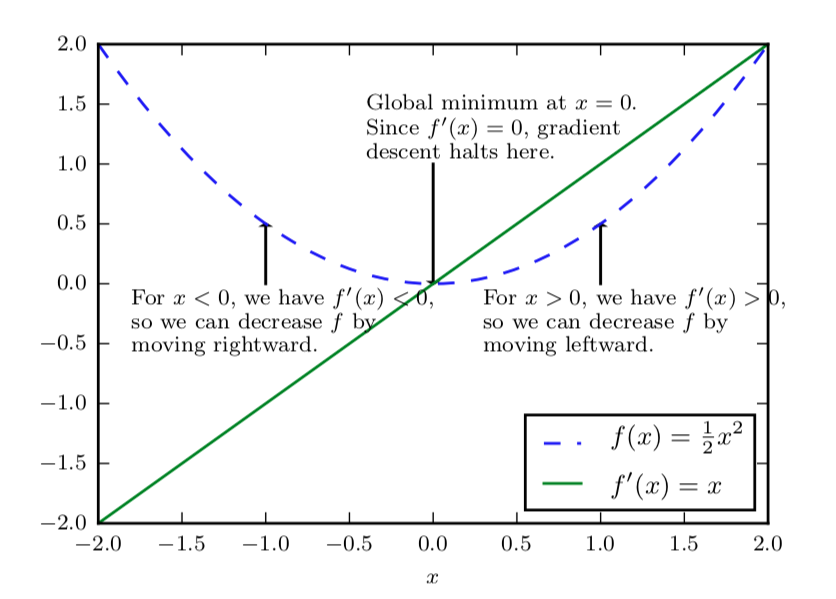

In [6]:
Image(filename='./dl1.png', width=500)

- $f^{'}(x)$ = 0 olduğunda, türev hangi yöne doğru ilermemiz gerektiği konusunda hiçbir bilgi sağlamaz. $f^{'}(x)$ = 0 olduğu x noktaları, kritik noktalar olarak bilinirler. **Yerel minimum**, f(x) fonksiyonunun bütün komşu noktalardan daha küçük olduğu bir noktadır. Bu noktada f(x) değerini sonsuz küçüklükte adımlar atarak küçültmek mümkün olmaz. **Yerel maksimum**, f(x) fonksiyonunun bütün komşu noktalardan daha büyük olduğu bir noktadır. Bu noktada ise f(x) değerini sonsuz küçüklükte adımlar atarak büyütmek mümkün değildir. Bazı kritik noktalar ne maksimum ne de minimumdur. Bu tür noktalar **eyer noktası** olarak bilinir.

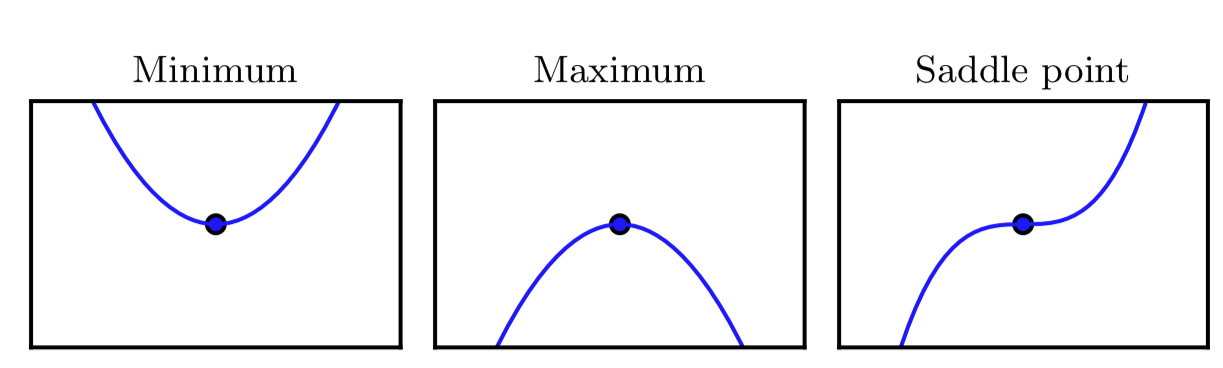

In [7]:
Image(filename='./dl2.png', width=500)

- f (x) fonksiyonun alabileceği en küçük değeri aldığı noktaya **"global minimum"** denir. 
- Sıkça birden fazla giridye sahip olan fonksiyonları enküçültürüz. Ancak enküçültme kavramının bir anlam taşıması için fonksiyon çıktısı yalnızca bir skalerden oluşmalıdır.
- Birden fazla girdisi olan fonksiyonlar için **kısmı türev** kullanılır. $\frac{\partial}{\partial x_i} f(x)$ şeklinde ifade edilen kısmı türev, f fonksiyonunun yalnızca $x_i$ değişkenindeki farklı değerler için ne kadar değiştiğini ölçer. **Gradyan** kavramı, türevi, vektörlerin türevini kapsayacak şekilde genelleştirir: f fonksiyonun gradyanı, $\nabla_{x} f(x)$ şeklinde ifade edilen ve bütün kısmi türevleri içeren bir vektördür. Gradyanın i'inci elemanı f fonksiyonunun $x_i$ değişkenine göre türevidir. Çok boyutlu fonksiyonlarda kritik noktalar, gradyanın bütün elemanlarının sıfıra eşit olduğu noktalardır.
- u birim vektörü yönündeki yönsel türev, f fonksiyonunun u yönündeki eğimidir. Diğer bir değişle yönlü türev f(x+$\alpha$u) fonksiyonunun, $\alpha$ değişkenşne göre türevin $\alpha$ = 0 için değeridir. Zincir kuralı kullanılarak $\frac{\partial}{\partial x_i} f(x + \alpha u)$ ifadesinin, $\alpha$ = 0 durumunda $u^T \nabla_{x} f(x)$ değerine eşit olduğunu görebiliriz. 
- f fonksiyonunu enküçültmek için fonksiyonun en hızlı azaldığı yönü bulmamız gerekir.
- Gradyan doğrudan yukarı işaret ederken, gradyanın negatifi ise doğrudan aşağı işaret eder. Bu **en dik iniş** yöntemi ya da **gradyan inişi** olarak bilinir.
- En dik iniş her adımda x' = x - $\epsilon \nabla_{x}f(x)$ noktasını önerir. 
- Burada $\epsilon$ **öğrenme oranı** adı verilen pozitif bir **skalerdir** ve adımın büyüklüğünü belirler, $\epsilon$ değerini birçok farklı şekilde seçebiliriz.
- **Gradyan inişi** algoritması, gradyanın bütün elemanları sıfır ya da sıfıra çok yakın oldığunda en küçük değere yakınsar.

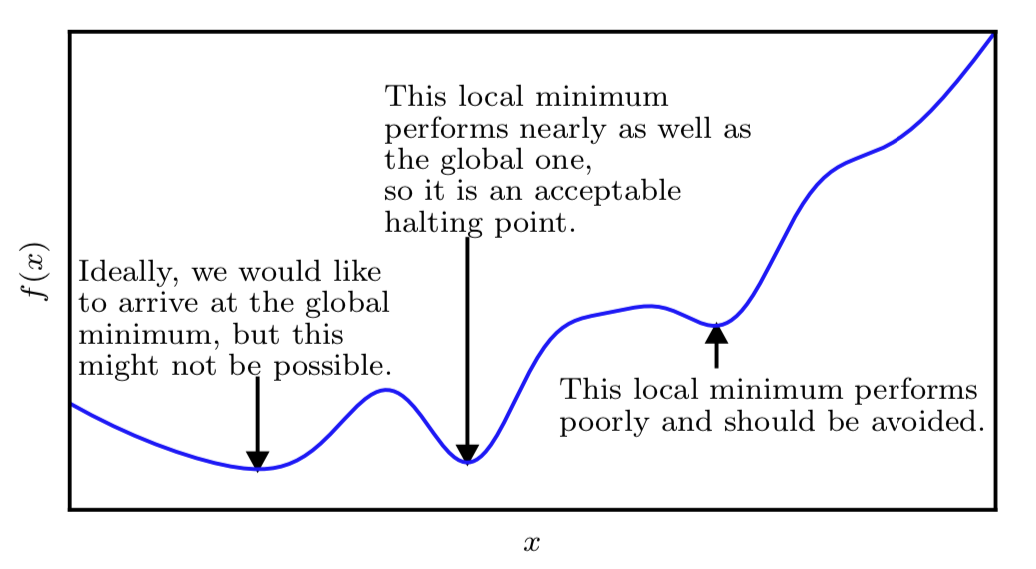

In [8]:
Image(filename='./dl3.png', width=500)

**Geriye Yayılım**

- Geri yayılım, nihai çıktı ve istenen çıktı dikkate alınarak sinir ağındaki ağırlıkları güncellemek için kullanılan bir yöntemdir. Her bir ağırlığa göre türev, zincir kuralı kullanılarak hesaplanır.

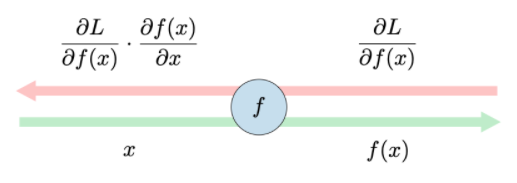

In [9]:
Image(filename='./dl4.png', width=500)

W = W - $\alpha$ $\frac{\partial L}{\partial w}$ 

Ağırlıkların güncellenmesi: 
- Bir sinir ağında, ağırlıklar aşağıdaki gibi güncellenir:
    - İleri Yayılım: Eğitim verisi kullanılarak kayıp hesaplanır.
    - Geri Yayılım:  Her ağırlığa göre kaybın derecesini belirlemek için kayıp tekrar geriye doğru yayılır.
    - Ağırlıkların Güncellenmesi: Ağın ağırlıklarını güncellemek için gradyan kullanılır.

#### Bias - Varyans

- **Bias (Önyargı):** Bir modelin önyargısı, beklenen tahmin ve verilen veri noktaları için tahmin etmeye çalıştığımız doğru model arasındaki farktır.
- **Varyans:** Bir modelin varyansı, belirli veri noktaları için model tahmininin değişkenliğidir.
- **Bias/varyans İlişkisi:** Daha basit model, daha yüksek önyargıya sahiptir. Daha karmaşık model, daha yüksek varyans değerine sahiptir.

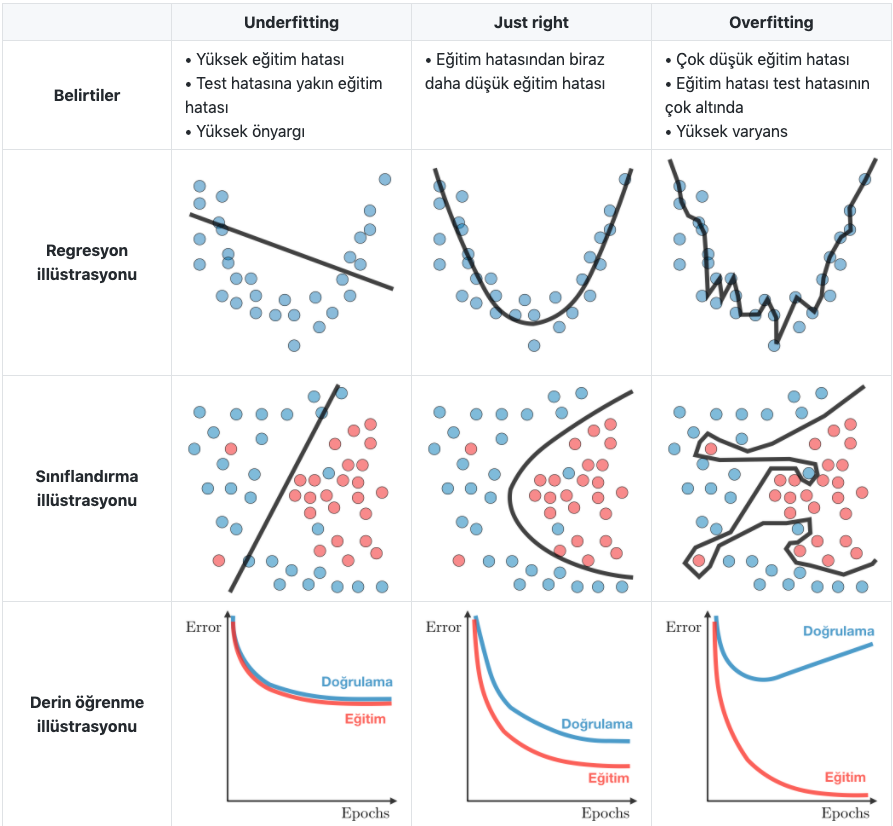

In [10]:
Image(filename='./dl5.png')

### Uygulama-1

- Bu veri seti 1970'lere ait Boston banliyösündeki ev fiyatlarından oluşmaktadır. 404'ü eğitim 102'si test örneği olmak üzere toplam 506 örnek ile göreceli olarak diğerlerinden daha az veriye sahiptir. Verideki her nitelik farklı ölçektedir. Örneğin bazıları 0 ile 1 arasında değer alırken, bazıları ise 0 ile 100 arasında değerler almaktadır.

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.datasets import boston_housing


In [12]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [13]:
print(f'Eğitim Verisi :',train_data.shape)
print(f'Test Verisi :',test_data.shape)
print(f'Eğitim Örneği :',train_data[0])
print(f'Eğitim Örneği (Etiket için):',train_labels[0])

Eğitim Verisi : (404, 13)
Test Verisi : (102, 13)
Eğitim Örneği : [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Eğitim Örneği (Etiket için): 15.2


- Farklı aralıkta olan verilerle sinir ağlarını beslemek yanlılık katabilir. Bunu gidermek için genellikle normalizasyon işlemi yapılmaktadır. Her sütundan ilgili sütunun ortalamasını çıkarıp standart sapmasına bölmektedir. Böylece nitelik 0 civarında ortalanır ve birim standart sapmaya sahiptir. 

In [14]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

- Veri setimiz az olduğu için 64 düğümlü iki gizli katman kullandık. Küçük ağ kullanarak aşırı uydurmayı önlemenin bir yolunu uyguladık.

In [15]:
train_data.shape[1]

13

In [16]:
from keras import models
from keras import layers

# Model oluşturuluyor
model = models.Sequential()

# Modele iki gizli katman ekliyoruz.
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))

# Son eklediğimiz katman ise çıktı katmanıdır. 
model.add(layers.Dense(1))

- Modelimizin son katmanı 1 düğümden (birimden) oluşmaktadır. Fark edildiği üzere herhangi bir aktivasyon fonksiyonuna sahip değildir. Çünkü bir aktivasyon fonksiyonu kullanmak çıktının aralığını sınırlandırıcaktır. Örneğin: çıktı katmanımız sigmoid fonksiyonunun sahip olsaydı çıktılar 0 ile 1 arasında olabilecekti. Bu sebeplerden dolayı son katmanda aktivasyon fonk. kullanılmamıştır yani doğrusal olarak seçilmiştir. Bu sayede modelimiz tahmin edeceği değerle konusunda serbest bırakılmıştır.

In [17]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

- Modelimizi derlerken MSE (Mean Squared Error - Ortalama Karesel Hata --> Tahminler ve gerçek değerler arasındaki farkın karesidir) kayıp fonksiyonu olarak kullanılmıştır. MSE bağlanım problemlerinde sıkça tercih edilmektedir.
- Bu model kapsamında MAE (Mean Absolute Error --> Ortalama Mutlak Hata) metriğini kullandık.

**K-Fold Yaklaşımı:**
- Verilerimizi eğitim ve doğrulama olarak ayırıyoruz. Bu problem kapsamında elimizde çok az veri mevcut ve doğrulama için ayırmamız halinde çok küçük bir veri setiyle karşı karşıya geleceğiz. Buna bağlı olarak da doğrulama değerleri hangi verinin doğrulama verisi olduğuna bağlı olarak değişecektir. Bu durumda doğrulama değerleri doğrulama veri setine bağlı olarak yüksek varyansa sahip olacaktır.

- Bunun gibi durumlarda uygulanabilecek en iyi yöntem K-fold çapraz doğrulamadır. Eldeki veri K parçaya (örneğin; k=4 veya 5) ayrılır, K tane aynı model oluşturulup her biri K-1 parça veriyle eğitilip kalanı da değerlendirmeye tabi tutulur. Doğrulama skoru K tane doğrulama skorununun ortalamasıdır. 

In [18]:
len(train_data) // 4

101

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 80
all_scores = []

for i in range(k):
    print(i)
    
    # k'ıncı parçadaki doğrulama verisini hazırlar. [303:404]
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i+1) * num_val_samples]
    
    
    # Eğitim veri setini hazırlar: Veriler diğer parçalardan gelir.
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    
    partial_train_labels = np.concatenate(
                            [train_labels[:i * num_val_samples],
                            train_labels[(i+1)*num_val_samples:]],
                            axis=0)
    
    # Model sessiz modda eğitilir --> verbose=0
    model.fit(partial_train_data,
              partial_train_labels,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    
    # Doğrulama veri setinde değerlendirilir.
    val_mse, val_mae = model.evaluate(val_data, val_labels, verbose=0)
    all_scores.append(val_mae)

0
1
2
3


In [20]:
print(f'all_scores :', all_scores)
print(f'mean all scores :', np.mean(all_scores))

all_scores : [2.60688853263855, 2.2936179637908936, 1.9914120435714722, 1.3956716060638428]
mean all scores : 2.0718975365161896


- Farklı döngüler farklı sonuçlar (1.39 - 2.60) ortaya çıkarmıştır. Ortalama olarak ise ~ 2 olarak belirledik. Bu tüm K fold çapraz doğrulamasının ana getirisidir. Bu durumda ortalama olarak hedef değerlerden 2000 dolar kadar uzaktayız ki ortalama fiyatların 10000 ile 50000 dolar olduğu düşünülürse gayet iyi skor.

In [21]:
model.fit(train_data, train_labels, epochs=80, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 6ms/step - loss: 12.5627 - mae: 2.5641


In [22]:
test_mae_score

2.564117670059204

- Hala gerçek değerden yaklaşık 2564 dolar uzaktayız.

**Kaynaklar:**
- Derin Öğrenme (Buzdağı Yayınevi)
- Python ile Derin Öğrenme (Buzdağı Yayınevi)
- https://stanford.edu/~shervine/l/tr/teaching/cs-229/cheatsheet-machine-learning-tips-and-tricks